### Compute metric
## $R M S S E=\sqrt{\frac{1}{h} \frac{\sum_{t=n+1}^{n+h}\left(Y_{t}-\widehat{Y}_{t}\right)^{2}}{\frac{1}{n-1} \sum_{t=2}^{n}\left(Y_{t}-Y_{t-1}\right)^{2}}}$

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline

<IPython.core.display.Javascript object>

In [1]:
from utils import *
import warnings
from data_loader import DatasetLSTM
from train_autoregressive_lstm import train_lstm
from autoregressive_LSTM_model import LstmModel


warnings.filterwarnings("ignore")

In [4]:
# calendar = pd.read_csv('calendar.csv')
train = pd.read_csv("sales_train_validation.csv")
# submission = pd.read_csv('sample_submission.csv')
# test = pd.read_csv('sell_prices.csv')
# fit, val = pd.read_csv("fit.csv"), pd.read_csv("val.csv")
# train = pd.read_csv('train_ts.csv')

<IPython.core.display.Javascript object>

In [5]:
# train = ts_scale(train)

<IPython.core.display.Javascript object>

In [6]:
SIZE = 1913
DAYS = range(1, SIZE + 1)
ts_columns = [f"d_{i}" for i in DAYS]

fit = train[ts_columns].iloc[0 : 30488 // 2]
val = train[ts_columns].iloc[30488 // 2 : -2]

<IPython.core.display.Javascript object>

In [8]:
fit.shape[0] * 2

# fit["mean"] = fit.mean(axis=1)
# val["mean"] = val.mean(axis=1)

# fit["std"] = fit.std(axis=1)
# val["std"] = val.std(axis=1)

# # Normalisation
# fit = fit.apply(lambda row: (row - row["mean"]) / row["std"], axis=1)
# fit.drop(["mean", "std"], axis=1, inplace=True)

# val = val.apply(lambda row: (row - row["mean"]) / row["std"], axis=1)
# val.drop(["mean", "std"], axis=1, inplace=True)

30488

<IPython.core.display.Javascript object>

In [14]:
#test 
sin_array = np.zeros((30488,1913))
for i in range(30488):
    sin_array[i] = np.sin(i+1*np.arange(1,1914))


<IPython.core.display.Javascript object>

In [15]:
train = pd.DataFrame(sin_array)

<IPython.core.display.Javascript object>

In [21]:
fit = train.iloc[0 : 30488 // 2]
val = train.iloc[30488 // 2 : -2]

<IPython.core.display.Javascript object>

## **Data loader sanity check**

On va séparer le train en fit et val : Le fit contient les $N - 28$ premiers jours et le val contient les $28$ derniers jours.

In [22]:
criterion = nn.MSELoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 2048
start_day = 1800
target_size = 28

sequence_lenght = SIZE - (start_day + target_size)
print(sequence_lenght)
model = LstmModel(
    hidden_dim=128,
    batch_size=batch_size,
    target_size=target_size,
    n_layers=1,
    sequence_length=sequence_lenght,
    device=device,
)

optimizer = optim.Adam(model.parameters(), lr=0.0001)

data_train = DatasetLSTM(df=fit, start_day=start_day, target_size=target_size)
train_loader = DataLoader(
    data_train, batch_size=batch_size, shuffle=True, num_workers=4
)

data_val = DatasetLSTM(df=val, start_day=start_day, target_size=target_size)

val_loader = DataLoader(data_val, batch_size=batch_size, shuffle=True, num_workers=4)

n_epochs = 10

85


<IPython.core.display.Javascript object>

In [23]:
prediction = train_lstm(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    verbose=True,
    n_epochs=n_epochs,
)

Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0299 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299
Fit loss: 0.0300 and Val loss: 0.0299



<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'val_loss')

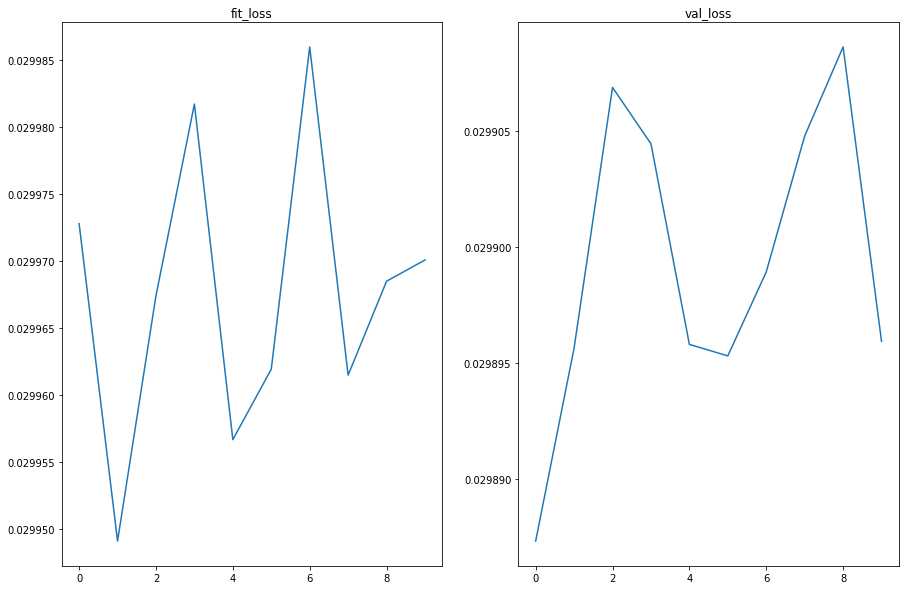

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
plt.plot(prediction[0])
plt.title('fit_loss')

plt.subplot(1,2,2)
plt.plot(prediction[1])
plt.title('val_loss')
